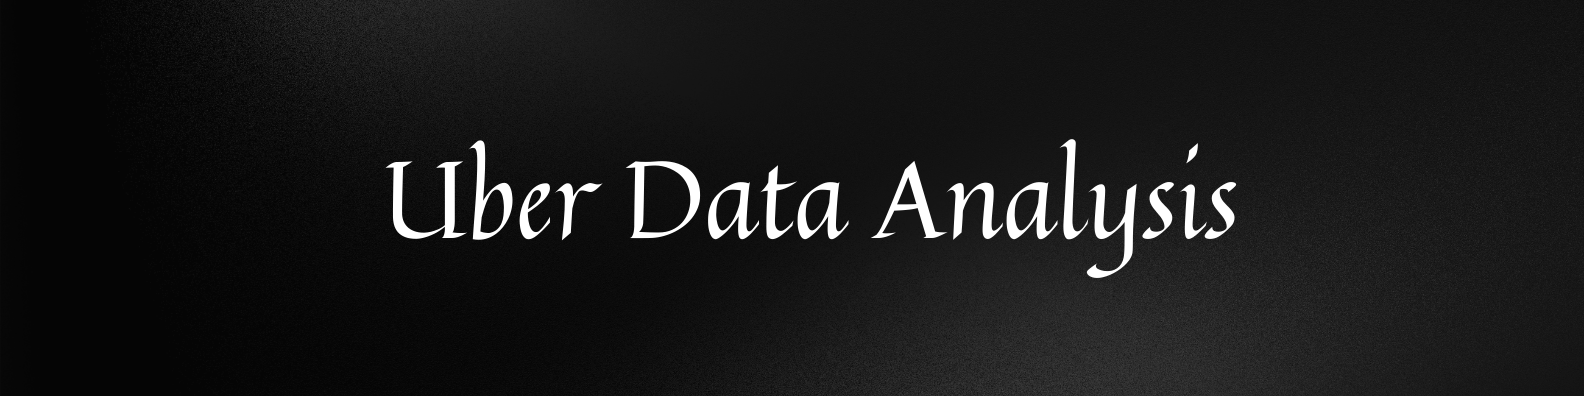

#**Data Description:**
1. START_DATE: Timestamp that marks the start of the trip.
2. END_DATE: Timestamp that marks the end of the trip.
3. CATEGORY: Uber customer category.
4. START: Location that marks the start of the trip.
5. STOP: Location that marks the start of the trip.
6. MILES: Travel distance.
7. PURPOSE: Customer's purpose of ordering Uber.

#**Importing the Necessary Libraries**

In [1]:
suppressMessages(library(dplyr))  #The dplyr package for data manipulation
suppressMessages(library(stringr))  #The stringr package for string operations
suppressMessages(library(lubridate))  #The lubridate package for date and time handling
suppressMessages(library(ggplot2))   #The ggplot2 package for data visualization

**suppressMessages()** will prevent any messages from being displayed during the package loading.

#**Importing Data**

In [2]:
#Load and Explore the Uber Dataset
uber_df=read.csv("UberDataset.csv")
#Display the first few rows of the 'uber_df' data frame
head(uber_df)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,
3,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
4,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
5,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
6,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [3]:
# View the last few rows of the uber_df data frame
tail(uber_df)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1151,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1152,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1153,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1154,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1155,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1156,Totals,,,,,12204.7,


#**Data Preprocessing**

##**Replacing Empty Strings with NA Values**

In [4]:
# Replace empty strings with NA in the uber_df data frame
uber_df[uber_df == ""] <- NA

# Display the first few rows of the updated uber_df data frame
head(uber_df)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NA
3,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
4,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
5,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
6,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


##**Converting necessary column to datetime object**

In [5]:
# Parse and convert the "START_DATE" column to a datetime format using specified date and time orders
uber_df$START_DATE <- parse_date_time(uber_df$START_DATE, orders = c("ymd H:M:S", "mdy H:M:S"), quiet = TRUE)

# Parse and convert the "END_DATE" column to a datetime format using specified date and time orders
uber_df$END_DATE <- parse_date_time(uber_df$END_DATE, orders = c("ymd H:M:S", "mdy H:M:S"), quiet = TRUE)

In [6]:
# Print the data types of columns in the 'uber_df' data frame
print(sapply(uber_df, class))

$START_DATE
[1] "POSIXct" "POSIXt" 

$END_DATE
[1] "POSIXct" "POSIXt" 

$CATEGORY
[1] "character"

$START
[1] "character"

$STOP
[1] "character"

$MILES
[1] "numeric"

$PURPOSE
[1] "character"



##**Checking Duplicated Values**

In [7]:
# Display duplicate rows in the uber_df data frame
uber_df[duplicated(uber_df), ]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
,<dttm>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>
493,2020-06-28 16:23:34,2020-06-28 16:23:59,Business,Durham,Cary,9.9,Meeting


In [8]:
# Remove duplicate rows from the uber_df data frame and keep only the distinct rows
uber_df <- distinct(uber_df)
uber_df[duplicated(uber_df), ]

START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
<dttm>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>


##**Identifying Missing Values**

In [9]:
# Print the sum of missing values (NA) for each column in the uber_df data frame
print(colSums(is.na(uber_df)))

START_DATE   END_DATE   CATEGORY      START       STOP      MILES    PURPOSE 
         1          1          1          1          1          0        503 


In [10]:
# Select rows in 'uber_df' where 'START_DATE' is missing (NA)
uber_df[is.na(uber_df$START_DATE), ]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
,<dttm>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>
1155,NA,NA,NA,NA,NA,12204.7,NA


In [11]:
# Remove the row at index 1155 from the 'uber_df' data frame
uber_df <- uber_df[-1155, ]

# Print the sum of missing values (NA) for each column in the modified 'uber_df'
print(colSums(is.na(uber_df)))

START_DATE   END_DATE   CATEGORY      START       STOP      MILES    PURPOSE 
         0          0          0          0          0          0        502 


##**Handling Missing Data: Replacing Empty Strings with NA Values**

In [12]:
# Fill the null values in the PURPOSE column with the value "Not Provided"
uber_df$PURPOSE[is.na(uber_df$PURPOSE)] <- "Not Provided"

# Print the total count of NA values in each column
print(colSums(is.na(uber_df)))

START_DATE   END_DATE   CATEGORY      START       STOP      MILES    PURPOSE 
         0          0          0          0          0          0          0 


In [13]:
# Count the frequency of unique values in the "PURPOSE" column
uber_df %>% count(PURPOSE)

PURPOSE,n
<chr>,<int>
Airport/Travel,3
Between Offices,18
Charity ($),1
Commute,1
Customer Visit,101
Errand/Supplies,128
Meal/Entertain,160
Meeting,186
Moving,4


##**Checking inconsistent data**

In [14]:
# Filter the uber_df data frame for 'START' values containing 'Kar?chi' or 'R?walpindi',
# and then count the occurrences of each unique 'START' value.
uber_df %>% filter(START %in% c('Kar?chi','R?walpindi')) %>% count(START)

START,n
<chr>,<int>
Kar?chi,27
R?walpindi,11


In [15]:
# Filter the uber_df data frame for 'STOP' values containing 'Kar?chi' or 'R?walpindi',
# and then count the occurrences of each unique 'STOP' value.
uber_df %>% filter(STOP %in% c('Kar?chi','R?walpindi')) %>% count(STOP)

STOP,n
<chr>,<int>
Kar?chi,26
R?walpindi,13


##**Standardizing Location Names**


In [16]:
# Replace "Kar?chi" with "Karachi" and "R?walpindi" with "Rawalpindi" in the START column
uber_df$START <- ifelse(uber_df$START == "Kar?chi", "Karachi",
                        ifelse(uber_df$START == "R?walpindi", "Rawalpindi", uber_df$START))

In [17]:
# Replace "Kar?chi" with "Karachi" and "R?walpindi" with "Rawalpindi" in the STOP column
uber_df$STOP <- ifelse(uber_df$STOP == "Kar?chi", "Karachi",
                        ifelse(uber_df$STOP == "R?walpindi", "Rawalpindi", uber_df$STOP))

#**Data Understanding**

In [18]:
# Display the structure of the uber_df data frame
str(uber_df)

'data.frame':	1154 obs. of  7 variables:
 $ START_DATE: POSIXct, format: "2001-01-20 16:21:11" "2001-02-20 16:01:25" ...
 $ END_DATE  : POSIXct, format: "2001-01-20 16:21:17" "2001-02-20 16:01:37" ...
 $ CATEGORY  : chr  "Business" "Business" "Business" "Business" ...
 $ START     : chr  "Fort Pierce" "Fort Pierce" "Fort Pierce" "Fort Pierce" ...
 $ STOP      : chr  "Fort Pierce" "Fort Pierce" "Fort Pierce" "Fort Pierce" ...
 $ MILES     : num  5.1 5 4.8 4.7 63.7 4.3 7.1 0.8 8.3 16.5 ...
 $ PURPOSE   : chr  "Meal/Entertain" "Not Provided" "Errand/Supplies" "Meeting" ...


In [19]:
# Check the dimensions of the uber_df data frame (number of rows and columns)
dim(uber_df)

[1] 1154    7

#**Data Exploration**

In [20]:
# The summary of the MILES column
summary(uber_df$MILES)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.50    2.90    6.00   10.57   10.40  310.30 

#**Data Visualization**

##**Boxplot**

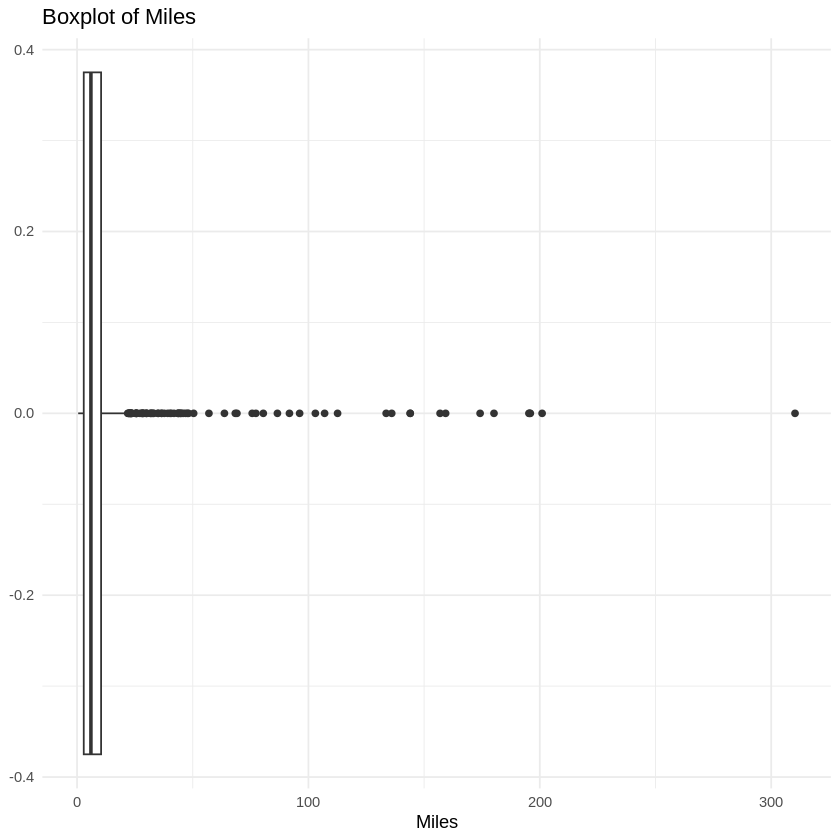

In [21]:
# Boxplot of the "MILES" column
ggplot(uber_df, aes(x = MILES)) +
  geom_boxplot() +
  labs(title = "Boxplot of Miles", x = "Miles") +
  theme_minimal()

##**Histogram**

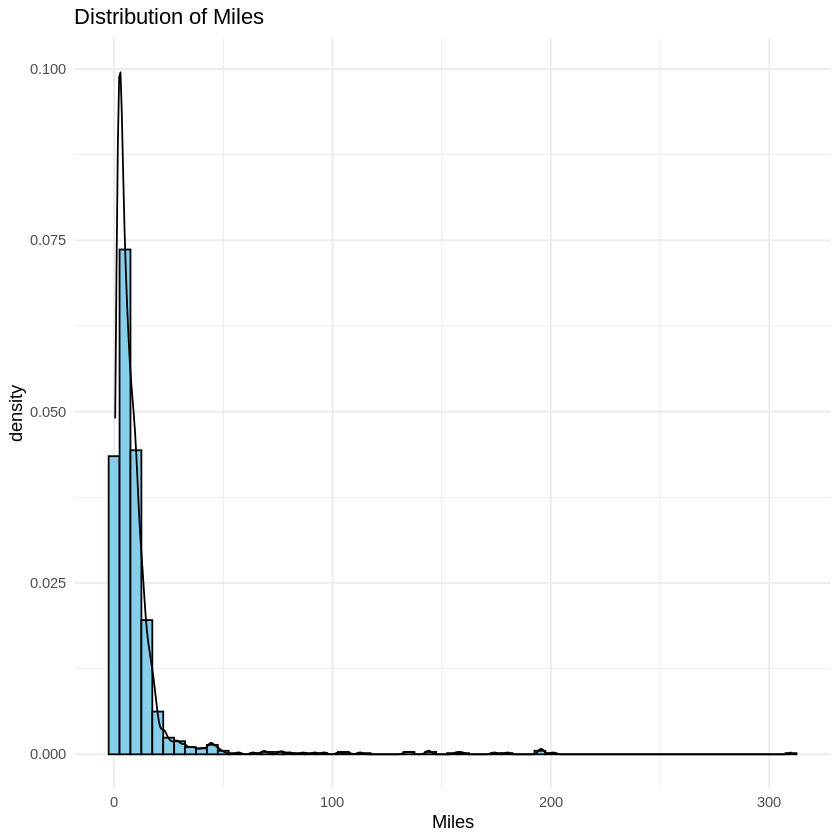

In [22]:
# Histogram of the "MILES" column
ggplot(uber_df, aes(x = MILES,y= after_stat(density))) +
  geom_histogram(binwidth = 5, fill = "skyblue", color = "black") +
  geom_density() +
  labs(title = "Distribution of Miles", x = "Miles") +
  theme_minimal()

##**Count of Uber Trips by Purpose**

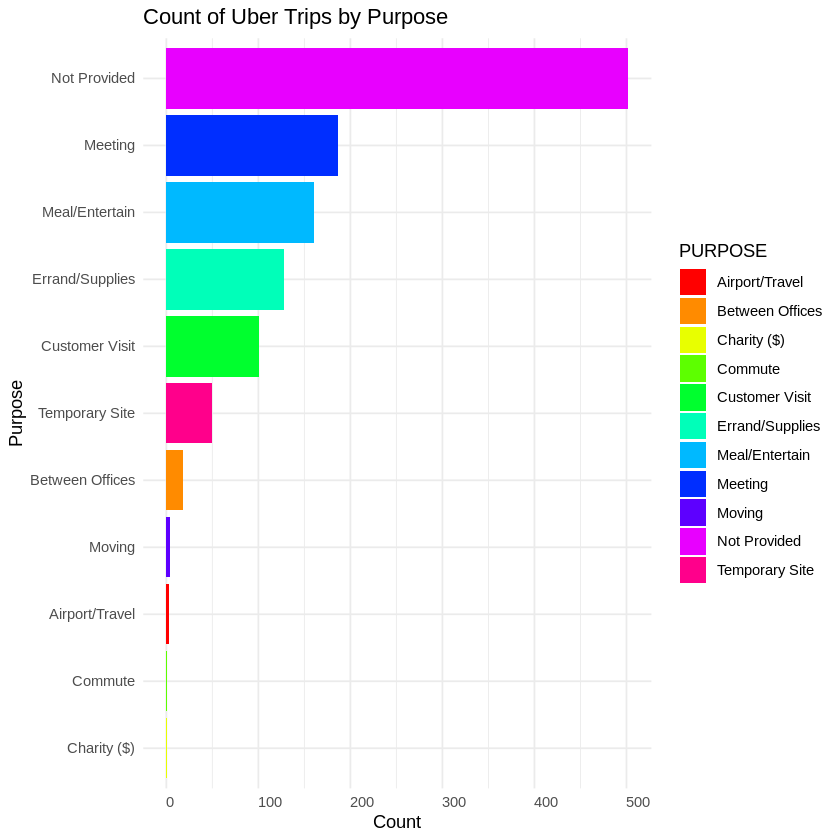

In [23]:
# Bar plot of the count of Uber trips by purpose
ggplot(uber_df %>% count(PURPOSE) %>% arrange(desc(n)), aes(x = n, y = reorder(PURPOSE, n), fill = PURPOSE)) +
  geom_bar(stat = "identity") +
  labs(title = "Count of Uber Trips by Purpose", x = "Count", y = "Purpose") +
  scale_fill_manual(values = rainbow(n_distinct(uber_df$PURPOSE))) +
  theme_minimal() +
  theme(axis.text.x = element_text(hjust = 0))

##**Top 10 Start Locations**

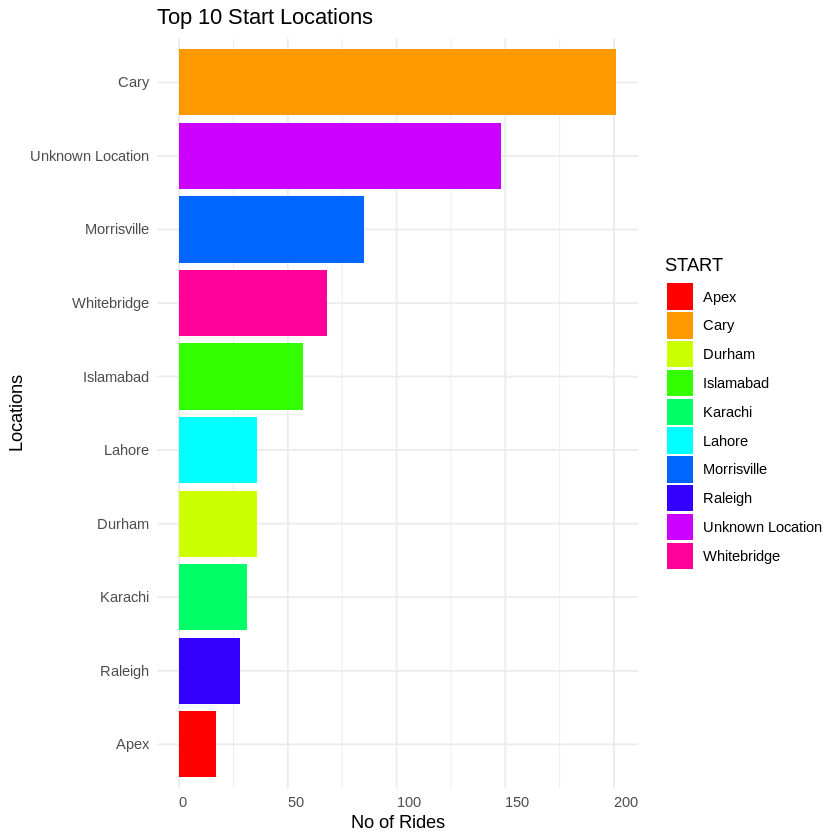

In [24]:
# Bar plot for the top 10 start locations by frequency
ggplot(uber_df %>% count(START) %>% arrange(desc(n)) %>% head(10), aes(x = n, y = reorder(START, n), fill = START)) +
  geom_bar(stat = "identity") +
  labs(title = "Top 10 Start Locations", x = "No of Rides", y = "Locations") +
  scale_fill_manual(values = rainbow(nrow(uber_df %>% count(START) %>% arrange(desc(n)) %>% head(10)))) +
  theme_minimal() +
  theme(axis.text.x = element_text(hjust = 0))

##**Top 10 Stop Locations**

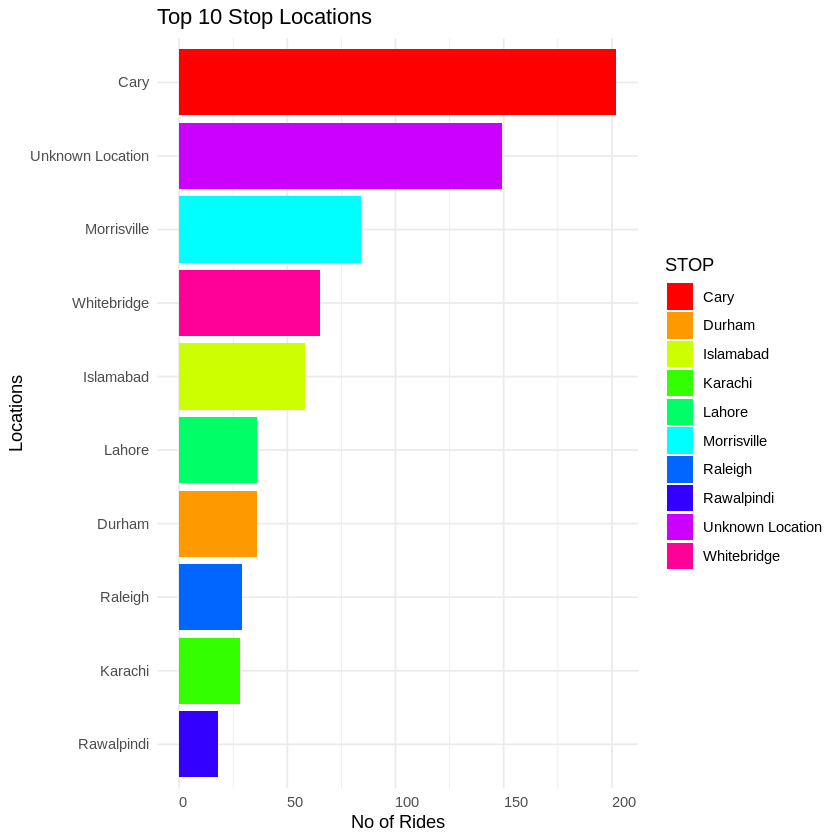

In [25]:
# Bar plot for the top 10 start locations by frequency
ggplot(uber_df %>% count(STOP) %>% arrange(desc(n)) %>% head(10), aes(x = n, y = reorder(STOP, n), fill = STOP)) +
  geom_bar(stat = "identity") +
  labs(title = "Top 10 Stop Locations", x = "No of Rides", y = "Locations") +
  scale_fill_manual(values = rainbow(nrow(uber_df %>% count(STOP) %>% arrange(desc(n)) %>% head(10)))) +
  theme_minimal() +
  theme(axis.text.x = element_text(hjust = 0))

##**Average Miles by Category**

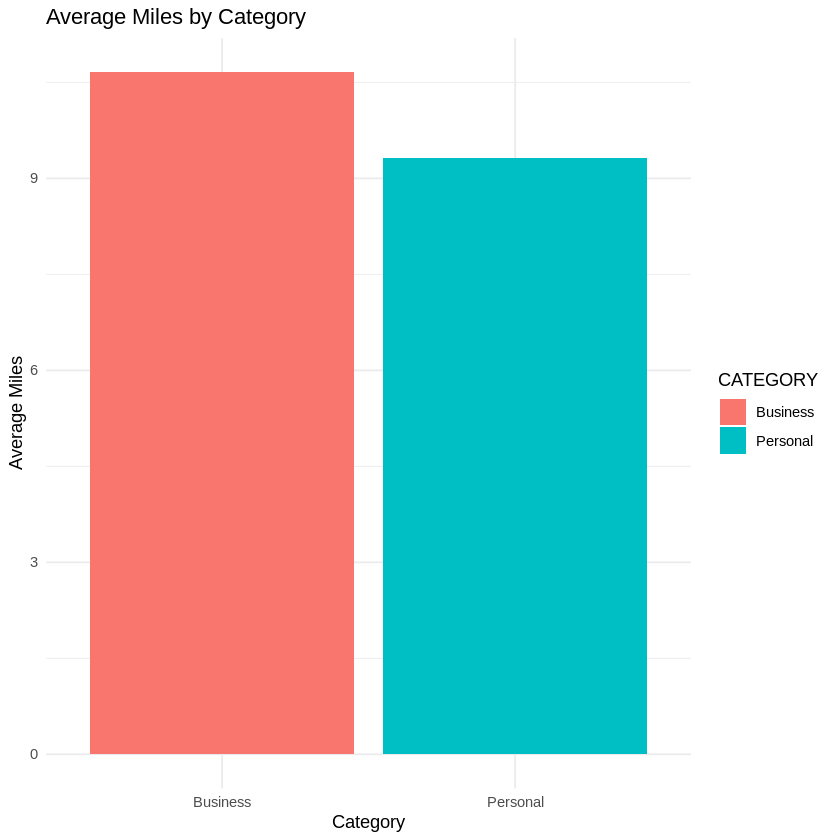

In [26]:
# Bar plot to visualize the average miles by category
ggplot(uber_df %>% group_by(CATEGORY) %>% summarise(mean_miles = mean(MILES)), aes(x = CATEGORY, y = mean_miles, fill = CATEGORY)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Miles by Category", x = "Category", y = "Average Miles") +
  theme_minimal()

##**Average Miles by Purpose**

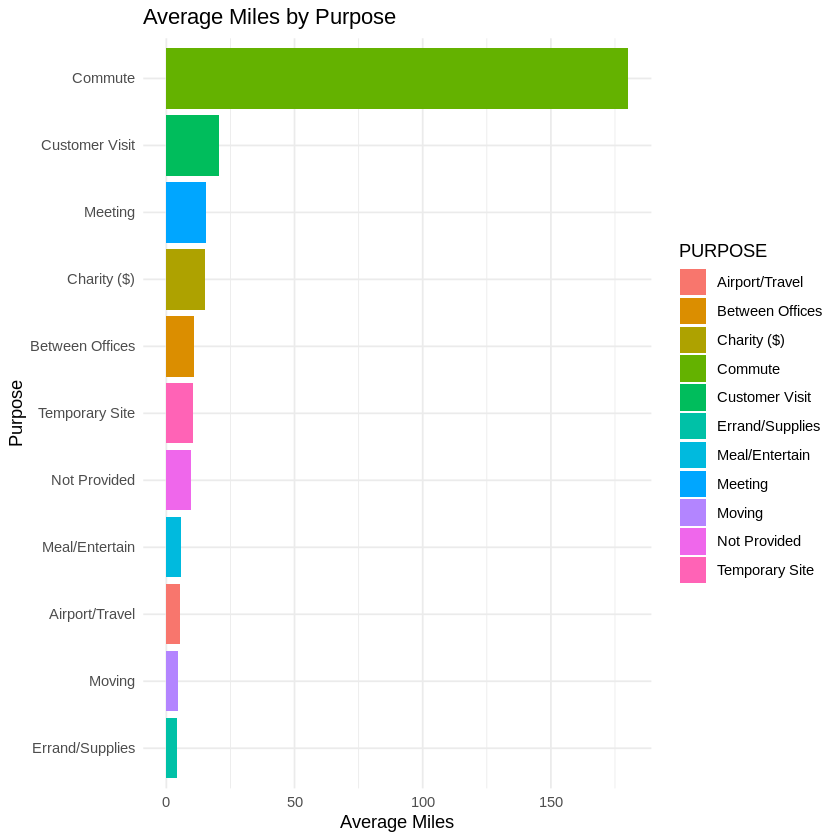

In [27]:
# Bar plot to visualize the average miles by category
ggplot(uber_df %>% group_by(PURPOSE) %>% summarise(mean_miles = mean(MILES)) %>% arrange(desc(mean_miles)),
aes(x = mean_miles, y = reorder(PURPOSE, mean_miles), fill = PURPOSE)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Miles by Purpose", x = "Average Miles", y = "Purpose") +
  theme_minimal()